In [1]:
from typing import TypedDict,Annotated
from langgraph.graph import add_messages,StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from dotenv import load_dotenv
# from langchain_community.tools.tavily_search import T
from langchain_tavily import TavilySearch
from langgraph.prebuilt import ToolNode


load_dotenv()


True

In [2]:

class ChildState:
    messages:Annotated[list,add_messages]



In [3]:

search_tool=TavilySearch(max_results=2)

tool=[search_tool]

model=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

llm_with_tools=model.bind_tools(tools=tool)

graph=StateGraph(ChildState)

tool_node=ToolNode(tools=tool)

In [4]:
def agent(state:ChildState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


In [5]:
def tools_router(state: ChildState):
    last_message = state["messages"][-1]
    if hasattr(last_message, "tool_calls") and len(last_message.tool_calls) > 0:
        return "tool_node"
    else:
        return "agent"

In [6]:

graph.add_node("agent",agent)
graph.add_node("tool_node",tool_node)
graph.set_entry_point("agent")

graph.add_conditional_edges("agent",tools_router)
graph.add_edge("tool_node","agent")

search_app=graph.compile()


In [1]:
search_app

NameError: name 'search_app' is not defined

In [15]:

from typing import TypedDict, Annotated
from langgraph.graph import add_messages, StateGraph, END,START
from langchain_core.messages import AIMessage, HumanMessage
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.prebuilt import ToolNode
from langchain_tavily import TavilySearch

load_dotenv()

class ChildState(TypedDict):
    messages: Annotated[list, add_messages]


search_tool = TavilySearch(max_results=2)
tools = [search_tool]

llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

llm_with_tools = llm.bind_tools(tools=tools)

def agent(state: ChildState):
    return {
        "messages": [llm_with_tools.invoke(state["messages"])], 
    }

def tools_router(state: ChildState):
    last_message = state["messages"][-1]
    print(last_message)
    if isinstance(last_message, AIMessage) and getattr(last_message, "tool_calls", None):
        return "tool_node"
    return END


tool_node = ToolNode(tools=tools)

subgraph = StateGraph(ChildState)

subgraph.add_node("agent", agent)
subgraph.add_node("tool_node", tool_node)

subgraph.add_edge(START,"agent")
subgraph.add_conditional_edges("agent", tools_router,["tool_node",END])
subgraph.add_edge("tool_node", "agent")

search_app = subgraph.compile()


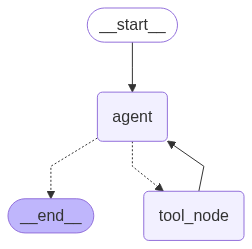

In [16]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        search_app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [17]:
search_app.invoke({"messages": [HumanMessage(content="search for latest news on 14 aug",)]})

content='' additional_kwargs={'function_call': {'name': 'tavily_search', 'arguments': '{"topic": "news", "time_range": "day", "query": "latest news on 14 aug"}'}} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []} id='run--ea9c203b-8800-49e4-a2f7-eecd086afb80-0' tool_calls=[{'name': 'tavily_search', 'args': {'topic': 'news', 'time_range': 'day', 'query': 'latest news on 14 aug'}, 'id': 'd6f6c827-f395-4c39-bb5f-fd7a4901937b', 'type': 'tool_call'}] usage_metadata={'input_tokens': 1100, 'output_tokens': 18, 'total_tokens': 1118, 'input_token_details': {'cache_read': 0}}
content='Here\'s a summary of the latest news from August 14th, 2025:\n\n* **Technology:**  News about the Biwin Mini SSD,  Radeon AI PRO R9700 cards, MSI Claw 8 AI+, MaxSun Arc Pro B60 Dual, and the GPD Win 5 Ryzen AI MAX+.\n* **Arts & Culture:** A review of the Joe Goode Performance Group\'s "Are You Okay?" show

{'messages': [HumanMessage(content='search for latest news on 14 aug', additional_kwargs={}, response_metadata={}, id='8cd79422-5d0f-4d4e-ad41-47d90aff22aa'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search', 'arguments': '{"topic": "news", "time_range": "day", "query": "latest news on 14 aug"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--ea9c203b-8800-49e4-a2f7-eecd086afb80-0', tool_calls=[{'name': 'tavily_search', 'args': {'topic': 'news', 'time_range': 'day', 'query': 'latest news on 14 aug'}, 'id': 'd6f6c827-f395-4c39-bb5f-fd7a4901937b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1100, 'output_tokens': 18, 'total_tokens': 1118, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='{"query": "latest news on 14 aug", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": 